**Basics of logistic regression**

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# Load data
df = pd.read_csv(r'https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/PredictiveModeling/Classification/Examples/Admittance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SAT       168 non-null    int64 
 1   Admitted  168 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [ ]:
df

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [ ]:
# map categorical column to 0,1
df['Admitted'] = df['Admitted'].map({'Yes':1,'No':0})
df

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [ ]:
x = df['SAT']
y = df['Admitted']

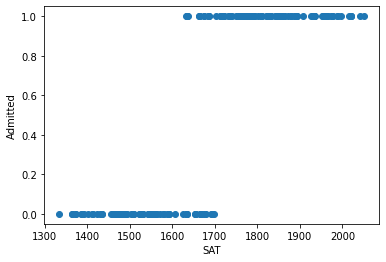

In [ ]:
plt.scatter(x,y,color='C0')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

In [ ]:
# Linear regression with statsmodels

x1 = sm.add_constant(x)
reg_lin = sm.OLS(y,x1)
results_lin = reg_lin.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
results_lin.summary()
# MLE: maximum likelihood estimation 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Tue, 31 May 2022   Prob (F-statistic):           2.98e-43
Time:                        20:53:11   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

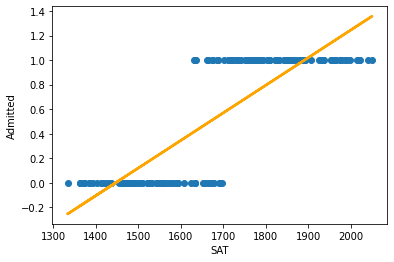

In [ ]:
plt.scatter(x,y,color = 'C0')
y_hat = x*results_lin.params[1] + results_lin.params[0]

plt.plot(x, y_hat, lw=2.5, color='orange')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

In [ ]:
# Logistic regression with statsmodels

reg_log = sm.Logit(y, x1)
results_log = reg_log.fit()


Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [ ]:
results_log.summary()

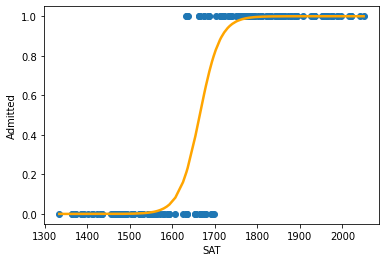

In [ ]:
def f(x, b0, b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x))

plt.scatter(x, y)
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.plot(x_sorted, f_sorted, lw=2.5, color='orange')
plt.show()

In [ ]:
# Logistic regression with Scikit-Learn

from sklearn.linear_model import LogisticRegression

X = x.values.reshape(-1,1)

clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [ ]:
y_hat = clf.predict(X)

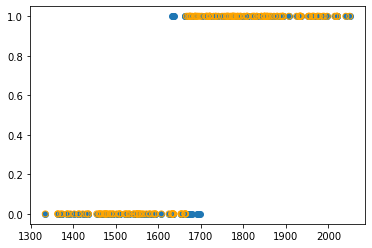

In [ ]:
plt.scatter(x, y)
plt.scatter(x, y_hat, facecolors='none', edgecolor='orange')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


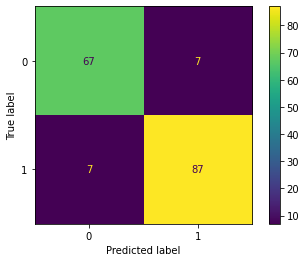

In [ ]:
from sklearn import metrics
metrics.plot_confusion_matrix(clf, X, y)